<Figure size 432x288 with 0 Axes>

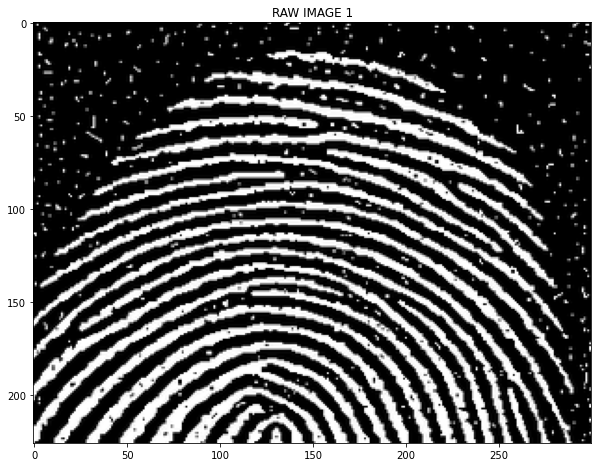

<Figure size 432x288 with 0 Axes>

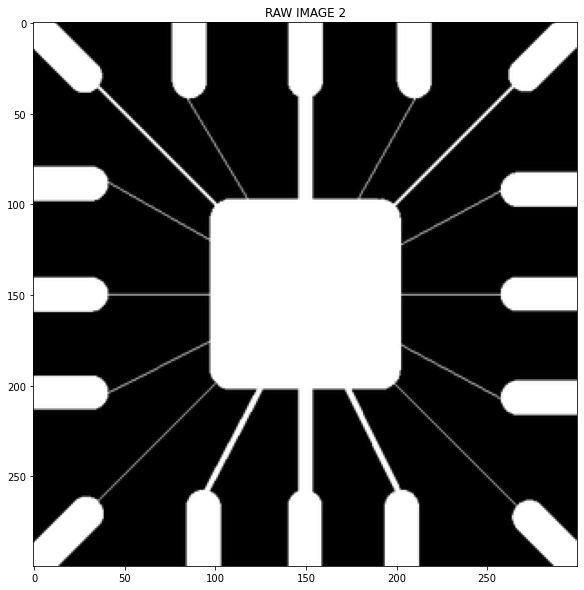

In [82]:
import itertools
from skimage import io,color
from matplotlib import pyplot as plt
import math
import cv2
import numpy as np
class Morphology:
    def ConvertToBinary(rawImg):
        return np.where(rawImg>128,1,0)

    def Dilation(rawImg,kernalSize):
        #Using 3x3 SE, reflect B about its Origin then shift it by Z, this is as mathematical expression
        #Only if all pixel of SubBlock doesn't match with convovledResult using SE puts a 0, else puts 1
        height , width = rawImg.shape

        structuringElement =  np.array([[0,1,0], [1,1,1],[0,1,0]])
        KERNAL_MID = kernalSize//2

        imgDilated = np.zeros_like(rawImg,dtype = np.uint8)

        for i in range(KERNAL_MID,height - KERNAL_MID):
            for j in range(KERNAL_MID,width - KERNAL_MID):
                imgSubBlock = rawImg[i - KERNAL_MID: i + KERNAL_MID + 1 , j - KERNAL_MID : j + KERNAL_MID + 1]
                convovledResult = imgSubBlock * structuringElement
                #convovledResult_SubBlock_All_Different = not (imgSubBlock != convovledResult).all()

                imgDilated[i,j] = np.max(convovledResult)

        return imgDilated

    def Erosion(rawImg,kernalSize):
        #Using 3x3 SE
        #If all pixel matches with the result after img Convoling with SE, puts 1 else puts 0.
        height , width = rawImg.shape

        structuringElement = np.array([[1,1,1], [1,1,1],[1,1,1]])
        KERNAL_MID = kernalSize//2

        imgEroded = np.zeros_like(rawImg,dtype = np.uint8)

        for i in range(KERNAL_MID,height - KERNAL_MID):
            for j in range(KERNAL_MID,width - KERNAL_MID):
                imgSubBlock = rawImg[i - KERNAL_MID: i + KERNAL_MID + 1 , j - KERNAL_MID : j + KERNAL_MID + 1]
                convovledResult = imgSubBlock * structuringElement

                #convovledResult_SubBlock_Equal = np.array_equal(convovledResult, imgSubBlock)

                imgEroded[i,j] = np.min(convovledResult)

        return imgEroded


    def Opening(rawImg,kernalSize):
    #First perform erosion then perform dilation
        imgEroded =  Morphology.Erosion(rawImg,kernalSize)

        return Morphology.Dilation(imgEroded,kernalSize)


    def Closing(rawImg,kernalSize):
    #First perform dilation then perform erosion
        imgDilated =  Morphology.Dilation(rawImg,kernalSize)

        return Morphology.Erosion(imgDilated,kernalSize)


    def BoundaryExtraction(rawImg,kernalSize):
    #1. Perform erosion of the input image
        imgEroded =  Morphology.Erosion(rawImg,kernalSize)
    #2. Subtract the eroded image from the original Image
        imgEdged = Morphology.Opening(rawImg,kernalSize) - imgEroded

        return imgEdged

KERNAL_SIZE = 3
path1 = "C:/Users/HIBIKI/Desktop/New_LAB612_Training/Python Week 4/morphology_1.png"
path2 = "C:/Users/HIBIKI/Desktop/New_LAB612_Training/Python Week 4/morphology.png"
raw_img1 = cv2.imread(path1,0)
raw_img2 = cv2.imread(path2,0)

plt.figure(0)
plt.figure(figsize=(10, 10))
plt.title("RAW IMAGE 1")
plt.imshow(raw_img1,cmap = 'gray')
plt.show()

plt.figure(0)
plt.figure(figsize=(10, 10))
plt.title("RAW IMAGE 2")
plt.imshow(raw_img2,cmap = 'gray')
plt.show()

<Figure size 432x288 with 0 Axes>

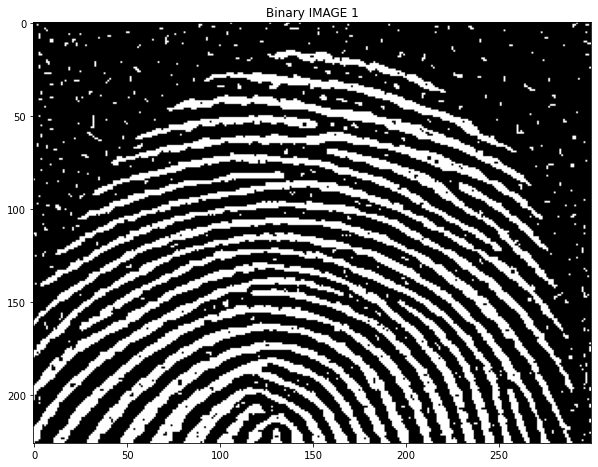

<Figure size 432x288 with 0 Axes>

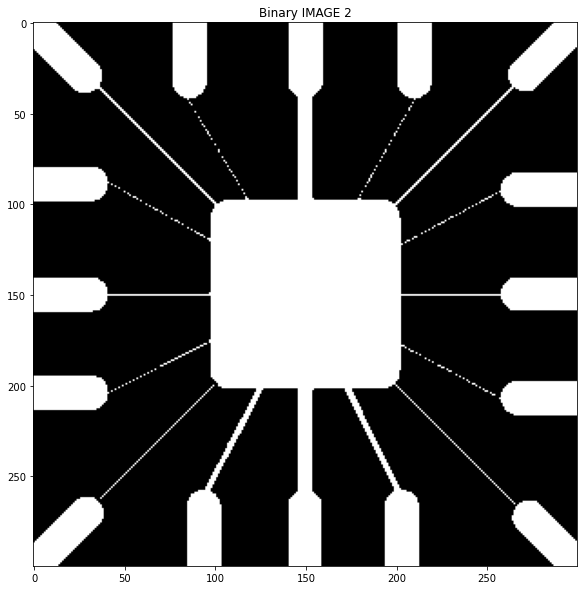

In [83]:
img1Binary = Morphology.ConvertToBinary(raw_img1)
img2Binary = Morphology.ConvertToBinary(raw_img2)

plt.figure(0)
plt.figure(figsize=(10, 10))
plt.title("Binary IMAGE 1")
plt.imshow(img1Binary,cmap = 'gray')
plt.show()

plt.figure(0)
plt.figure(figsize=(10, 10))
plt.title("Binary IMAGE 2")
plt.imshow(img2Binary,cmap = 'gray')
plt.show()

<Figure size 432x288 with 0 Axes>

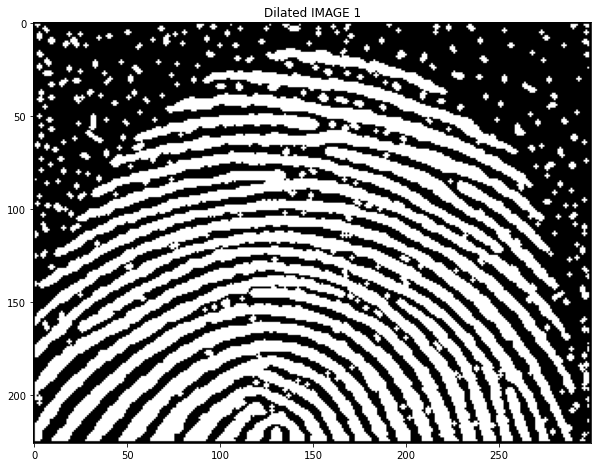

<Figure size 432x288 with 0 Axes>

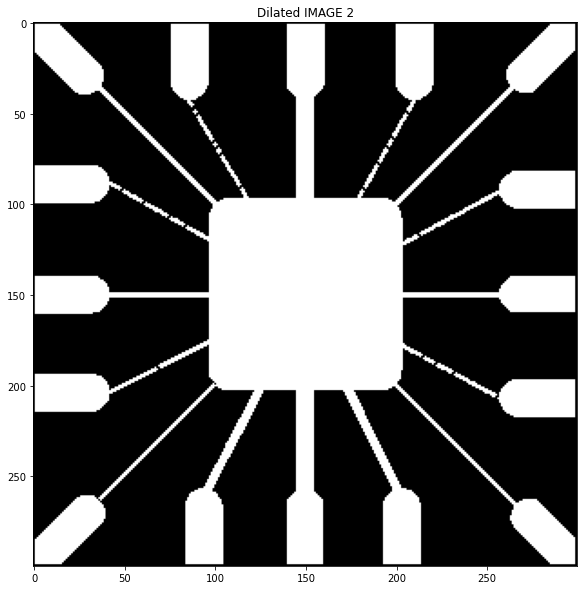

In [84]:
img1Dilated = Morphology.Dilation(img1Binary,KERNAL_SIZE)
img2Dilated = Morphology.Dilation(img2Binary,KERNAL_SIZE)

plt.figure(0)
plt.figure(figsize=(10, 10))
plt.title("Dilated IMAGE 1")
plt.imshow(img1Dilated,cmap = 'gray')
plt.show()

plt.figure(0)
plt.figure(figsize=(10, 10))
plt.title("Dilated IMAGE 2")
plt.imshow(img2Dilated,cmap = 'gray')
plt.show()

<Figure size 432x288 with 0 Axes>

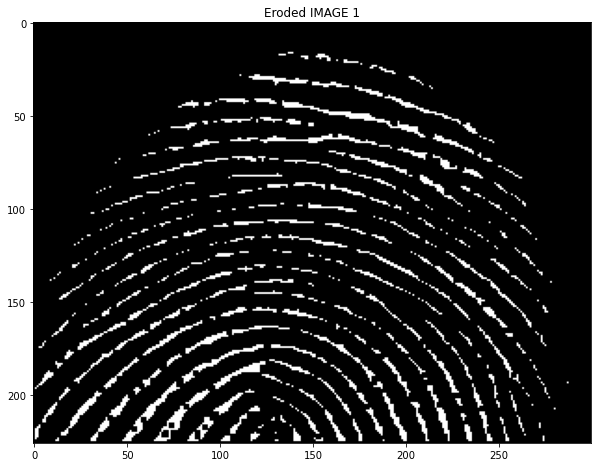

<Figure size 432x288 with 0 Axes>

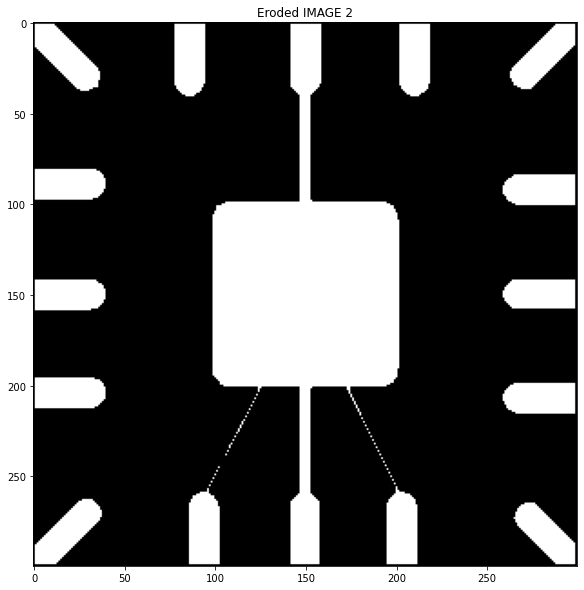

In [85]:
img1Eroded = Morphology.Erosion(img1Binary,KERNAL_SIZE)
img2Eroded = Morphology.Erosion(img2Binary,KERNAL_SIZE)

plt.figure(0)
plt.figure(figsize=(10, 10))
plt.title("Eroded IMAGE 1")
plt.imshow(img1Eroded,cmap = 'gray')
plt.show()

plt.figure(0)
plt.figure(figsize=(10, 10))
plt.title("Eroded IMAGE 2")
plt.imshow(img2Eroded,cmap = 'gray')
plt.show()

<Figure size 432x288 with 0 Axes>

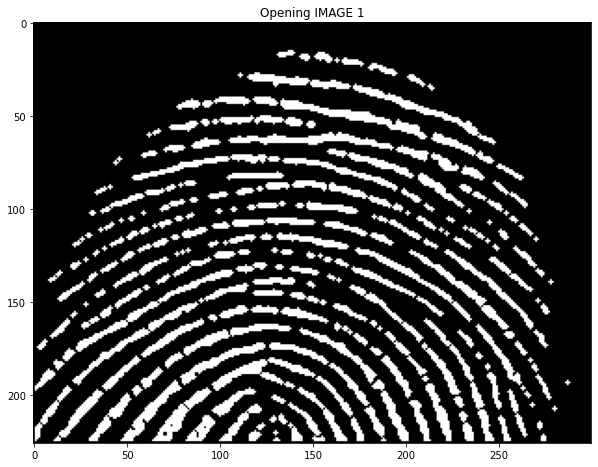

<Figure size 432x288 with 0 Axes>

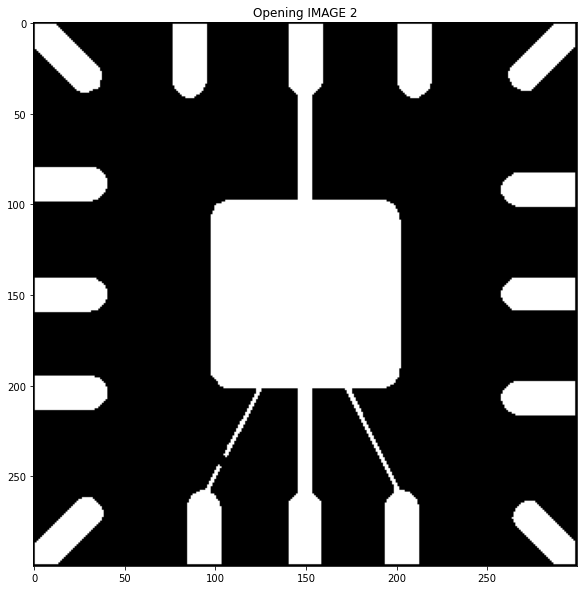

In [86]:
img1Opening = Morphology.Opening(img1Binary,KERNAL_SIZE)
img2Opening = Morphology.Opening(img2Binary,KERNAL_SIZE)

plt.figure(0)
plt.figure(figsize=(10, 10))
plt.title("Opening IMAGE 1")
plt.imshow(img1Opening,cmap = 'gray')
plt.show()

plt.figure(0)
plt.figure(figsize=(10, 10))
plt.title("Opening IMAGE 2")
plt.imshow(img2Opening,cmap = 'gray')
plt.show()

<Figure size 432x288 with 0 Axes>

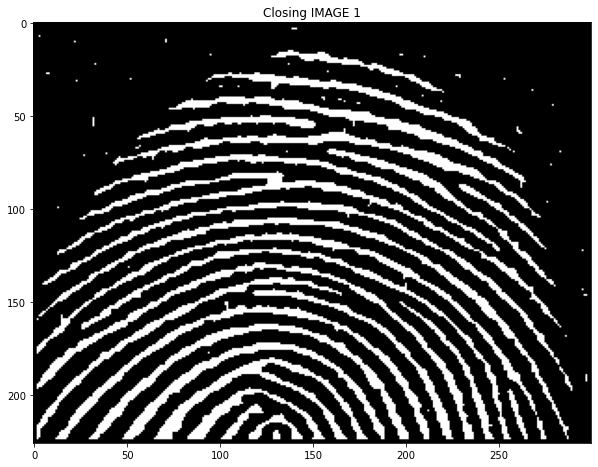

<Figure size 432x288 with 0 Axes>

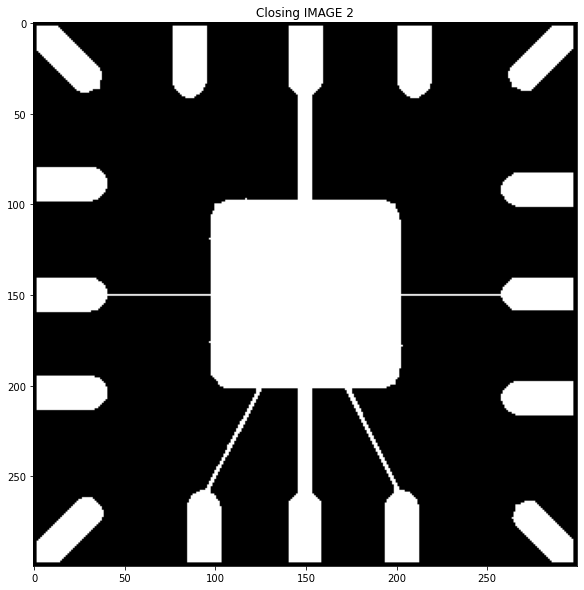

In [87]:
img1Closing = Morphology.Closing(img1Binary,KERNAL_SIZE)
img2Closing = Morphology.Closing(img2Binary,KERNAL_SIZE)

plt.figure(0)
plt.figure(figsize=(10, 10))
plt.title("Closing IMAGE 1")
plt.imshow(img1Closing,cmap = 'gray')
plt.show()

plt.figure(0)
plt.figure(figsize=(10, 10))
plt.title("Closing IMAGE 2")
plt.imshow(img2Closing,cmap = 'gray')
plt.show()

<Figure size 432x288 with 0 Axes>

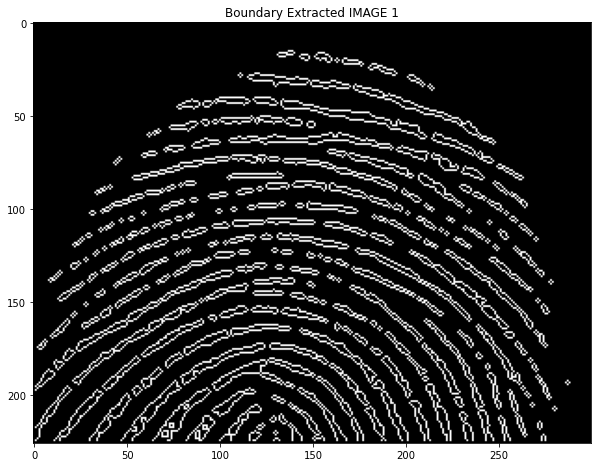

<Figure size 432x288 with 0 Axes>

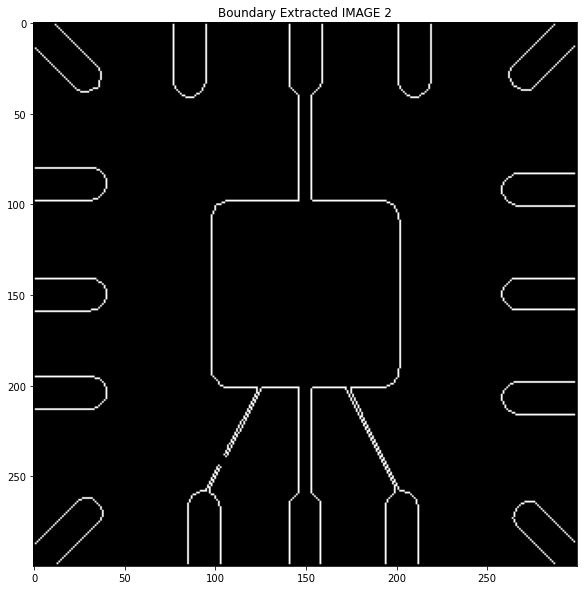

In [88]:
img1BoundaryExtraction = Morphology.BoundaryExtraction(img1Binary,KERNAL_SIZE)
img2BoundaryExtraction = Morphology.BoundaryExtraction(img2Binary,KERNAL_SIZE)

plt.figure(0)
plt.figure(figsize=(10, 10))
plt.title("Boundary Extracted IMAGE 1")
plt.imshow(img1BoundaryExtraction,cmap = 'gray')
plt.show()

plt.figure(0)
plt.figure(figsize=(10, 10))
plt.title("Boundary Extracted IMAGE 2")
plt.imshow(img2BoundaryExtraction,cmap = 'gray')
plt.show()